In [ ]:

import matplotlib.pyplot as plt
df=pd.read_csv('AAPL.csv')
df.head()
df1=df.reset_index()["close"]
df1.shape
#plt.plot(df1)

## LSTM are very sensitive to the data so we have to use MinMax scalar
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scalar=MinMaxScaler(feature_range=(0,1))
df1=scalar.fit_transform(np.array(df1).reshape(-1,1))

## splitting the train data and test data
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data, test_data =  df1[0:training_size],df1[training_size:len(df1)]

## writing the timestemp split function
def create_dataset(dataset,timestamp=1):
  dataX=[]
  dataY=[]
  for x in range(len(dataset)-timestamp-1):
      dataX.append(dataset[x:x+timestamp,0])
      dataY.append(dataset[x+timestamp,0])
  return np.array(dataX),np.array(dataY)  
##

timestamp=100
X_train, Y_train = create_dataset(train_data,timestamp)
X_test, Y_test = create_dataset(test_data,timestamp)
##
#print(train_data.shape)
print(X_train)

#Converting the Input into 3-D shape
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

##
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Create the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer = "adam")
model.summary()

# training the data
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64)


[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_25 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_26 (LSTM)              (None, 50)                20200     
                                                                 
 dense

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

## Inverse transform cause we have already scaled
train_predict=scalar.inverse_transform(train_predict)
test_predict=scalar.inverse_transform(test_predict)

import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

142.44688759140413

In [ ]:
math.sqrt(mean_squared_error(Y_test,test_predict))

240.7466797244494

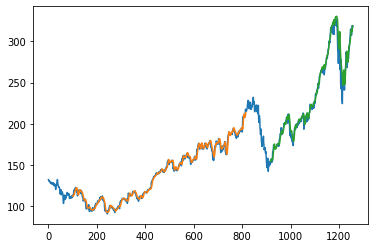

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalar.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()